![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

In [ ]:
import imageio
from skimage import data, io, filters
from skimage.io import imread, imshow
from skimage import data, img_as_float, color, exposure
import matplotlib.pyplot as plt
import scipy.misc
from scipy import ndimage
import numpy as np

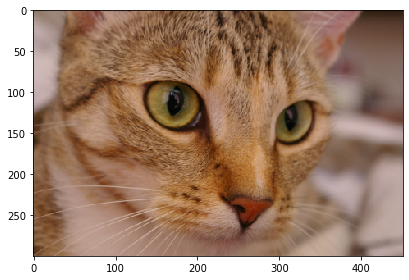

In [ ]:
cat = data.chelsea()
imshow(cat)

Crop the image

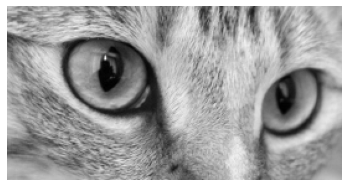

In [ ]:
#face = scipy.misc.face(gray=True)
cat2 = color.rgb2gray(data.chelsea())

lx, ly = cat2.shape

# Cropping (using floor division, dumping decimals after operation)
crop_cat = cat2[lx//5:-lx//3, ly//5:-ly//5]

plt.figure(figsize=(6, 6))
plt.imshow(crop_cat, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

Smoothen the image with a kernel filter.

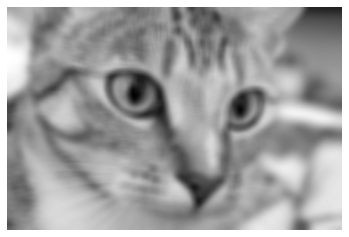

In [ ]:
#with no filter
local_mean = ndimage.uniform_filter(cat2, size=11)

plt.figure(figsize=(6, 6))
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

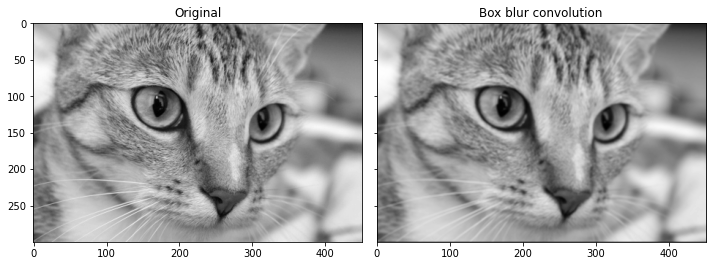

In [ ]:
#with a kernel filter
kernel = np.array([ [1/9,1/9,1/9], 
                    [1/9,1/9,1/9], 
                    [1/9,1/9,1/9]]) 

filtered = ndimage.convolve(cat2, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat2, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

Sharpen the image with a kernel filter

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


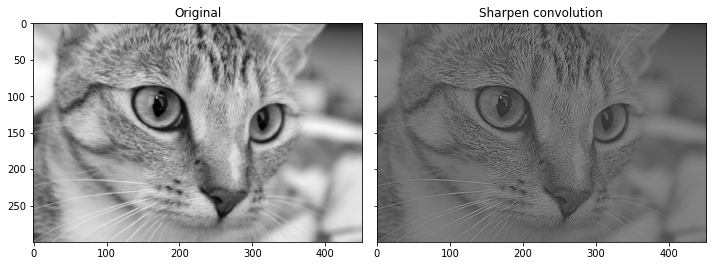

In [ ]:
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

print(kernel)

filtered = ndimage.convolve(cat2, kernel, mode='reflect', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat2, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

Find the edges of the image with at least two different methods.

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


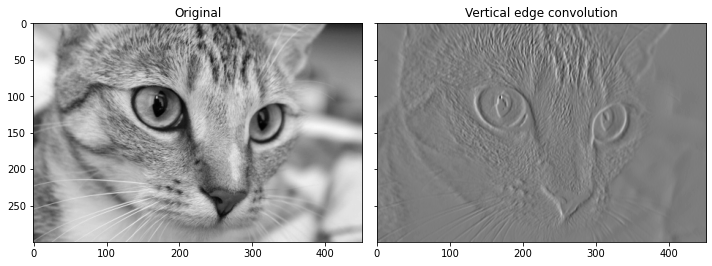

In [ ]:
kernel = np.array([ [-1, 0, 1], 
                    [-1, 0, 1], 
                    [-1, 0, 1]])

print(kernel)

filtered = ndimage.convolve(cat2, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat2, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Vertical edge convolution')

plt.tight_layout()
plt.show()

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


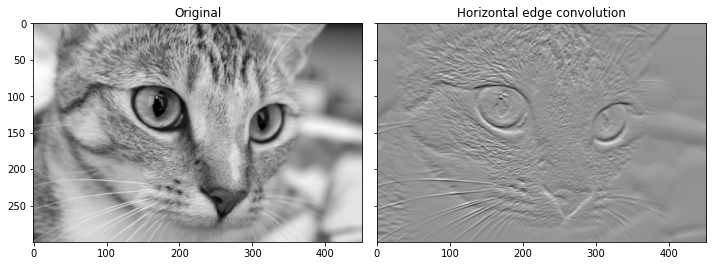

In [ ]:
kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]])

print(kernel)

filtered = ndimage.convolve(cat2, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(cat2, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Horizontal edge convolution')

plt.tight_layout()
plt.show()

From the processes above, save the image that you prefer as a .jpg

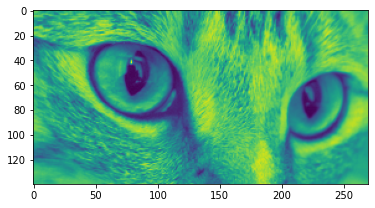

In [ ]:
import imageio
from scipy import misc

f = crop_cat
imageio.imwrite('cat_eyes.jpg', f)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

In [ ]:
IronMan_Blur = imageio.imread('IronMan_Blur.jpg')
type(IronMan_Blur)      

print("\n", IronMan_Blur.shape, IronMan_Blur.dtype)


 (1800, 4000, 3) uint8


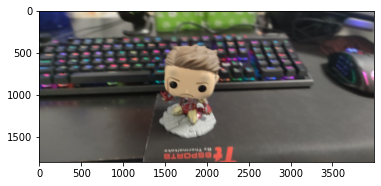

In [ ]:
plt.imshow(IronMan_Blur)#[200:400, 400:800]

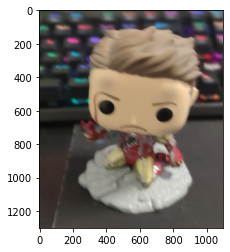

In [ ]:
plt.imshow(IronMan_Blur[300:1600, 1200:2300])#

In [ ]:
IronMan_Blur2 = color.rgb2gray(IronMan_Blur[300:1600, 1200:2300])

With Kernel

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


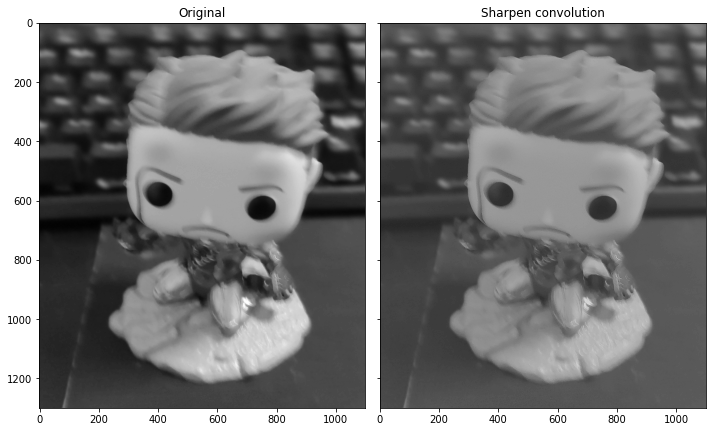

In [ ]:
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

print(kernel)

filtered = ndimage.convolve(IronMan_Blur2, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(IronMan_Blur2, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

Without Kernel

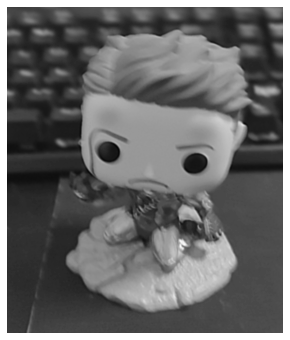

In [ ]:
# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(IronMan_Blur2, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.show()


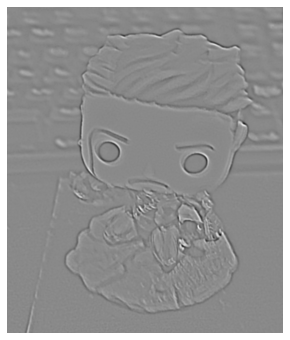

In [ ]:
# First we blur the image using a gaussian filter
blurred_f = ndimage.gaussian_filter(IronMan_Blur2, 3)

# Then we create another filter of the blurred image using sigma 1
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

# We use an approximation of the Laplacian for increasing the weights of edges
alpha = 30
edges_weights = alpha * (blurred_f - filter_blurred_f)

plt.figure(figsize=(6, 6))
plt.imshow(edges_weights, cmap=plt.cm.gray)
plt.axis('off')

plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

In [112]:
import imageio
from scipy import misc
from skimage import data, io, filters
from skimage.io import imread, imshow
from skimage import data, img_as_float, color, exposure
import matplotlib.pyplot as plt
import scipy.misc
from scipy import ndimage
import numpy as np

Keyboard = imageio.imread('Keyboard.jpg')
type(Chargers)      

print("\n", Keyboard.shape, Keyboard.dtype)


 (5760, 2592, 3) uint8


## **Counting the numbers on the keyboard of the mouse.**

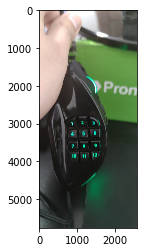

In [113]:
plt.imshow(Keyboard)

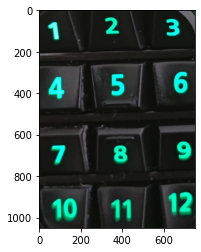

In [186]:
plt.imshow(Keyboard[2900:3950, 800:1550])

In [187]:
Keyboard_gray = color.rgb2gray(Keyboard[2900:3950, 800:1550])

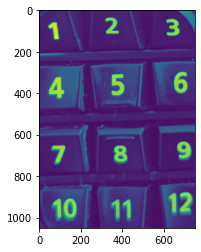

In [188]:
plt.imshow(Keyboard_gray)

Check the information on a histogram

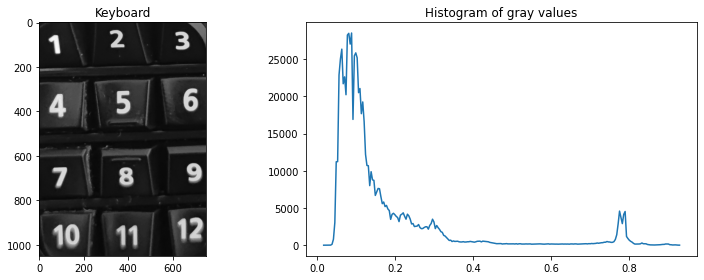

In [189]:
from skimage import data
from skimage.exposure import histogram

hist, hist_centers = histogram(Keyboard_gray)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(Keyboard_gray, cmap=plt.cm.gray)
ax[0].set_title('Keyboard')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histogram of gray values')

plt.tight_layout()
plt.show()

Using Sobel and canny filter to identify edges

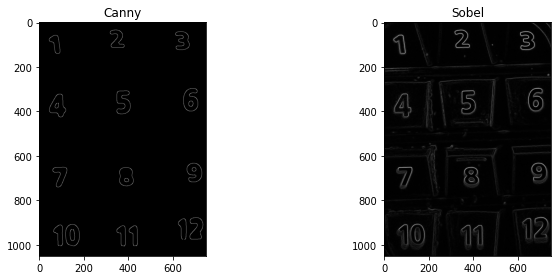

In [190]:
from skimage import data
from skimage.feature import canny
from skimage.filters import sobel

canny_Keyboard = canny(Keyboard_gray/1., sigma=6)

sobel_Keyboard = sobel(Keyboard_gray)

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_Keyboard, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_Keyboard, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show()

Filling the holles.

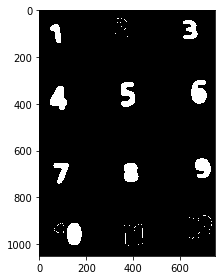

In [191]:
from skimage.io import imshow

from scipy import ndimage as ndi
fill_Keyboard = ndi.binary_fill_holes(canny_Keyboard)
imshow(fill_Keyboard)

Counting the numbers on the keyboard = 140 . False

140


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


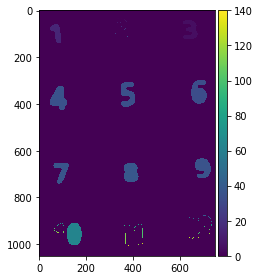

In [192]:
# we call the label function
label_objects, nb_labels = ndi.label(fill_Keyboard)
print(nb_labels)
imshow(label_objects)

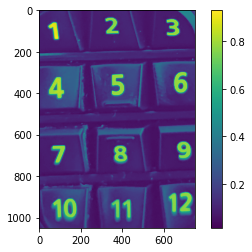

In [193]:
import matplotlib.pyplot as plt
plt.imshow(Keyboard_gray)
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


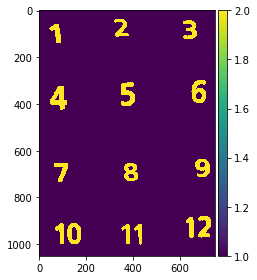

In [194]:
# Let's create a zeros array with the same shape as Keyboard_gray
markers = np.zeros_like(Keyboard_gray)

# When the pixels are below 0.6 (see image above), we can label as background(1)
markers[Keyboard_gray < 0.6] = 1

# When the pixels are above 0.6 (see image above), we can label as number(2)
markers[Keyboard_gray >= 0.6] = 2
imshow(markers)

**Using a watershed algorithm**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


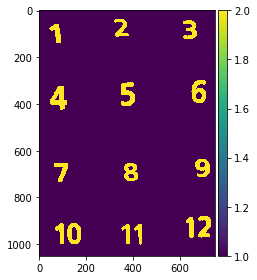

In [195]:
from skimage.morphology import watershed
segmentation_ = watershed(sobel_Keyboard, markers)
imshow(segmentation_)

**Remove the background values before filling!**

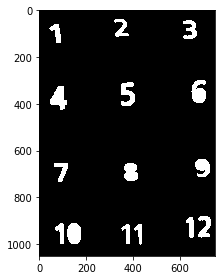

In [196]:
from skimage.io import imshow

segmentation_treshold = ndi.binary_fill_holes(segmentation_ - 1)
seg_mimadre = ndi.binary_opening(segmentation_treshold)
imshow(seg_mimadre)

****And now, We have the right quantity of numbers on the keyboard = 15****

15


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


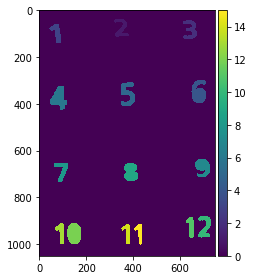

In [197]:
labeled_coins, _ = ndi.label(seg_mimadre)
print(_)
imshow(labeled_coins)